The hardest part of options trading is determining if they are cheap or expensive. Whether you buy or sell an option, you’re exposed to the volatility of the underlying. That’s why it’s important to compare volatility to its recent levels.

Volatility cones can help you do this.

In [6]:
%matplotlib inline

import math
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

Next, we’ll setup some variables we’ll use later. These are all Python lists. windows defines the number of days I want to use to compute volatility. quantiles defines the percentage of the top and bottom 25% of values. The last few lists are where we accumulate data to plot.

In [7]:
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]

min_ = []
max_ = []
median = []
top_q = []
bottom_q = []
realized = []

In [8]:
data = yf.download("JPM", start="2020-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


## Realized Volatility
Realized volatility is a measurement of how much the price or returns of stock vary. It’s used to optimize portfolios, detect regime changes, and price derivatives. The most common way to measure realized volatility is the standard deviation.

In [9]:
def realized_vol(price_data, window=30):
    
    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    return log_return.rolling(window=window, center=False).std() * math.sqrt(252)

In [11]:
print("windows shape:", np.shape(windows))
print("min_ shape:", np.shape(min_))
print("max_ shape:", np.shape(max_))
print("median shape:", np.shape(median))

windows shape: (4,)
min_ shape: (1, 1)
max_ shape: (1, 1)
median shape: (1, 1)


The next step is to loop through each of the windows and compute realized volatility over each time frame. estimator is a pandas DataFrame. That’s why it’s so easy so compute the min, max, median, and quantiles. Magic.

In [13]:
for window in windows:
    
    # get a dataframe with realized volatility
    estimator = realized_vol(window=window, price_data=data)
    
    # append the summary stats to a list
    min_.append(estimator.min())
    max_.append(estimator.max())
    median.append(estimator.median())
    top_q.append(estimator.quantile(quantiles[1]))
    bottom_q.append(estimator.quantile(quantiles[0]))
    realized.append(estimator.iloc[-1])

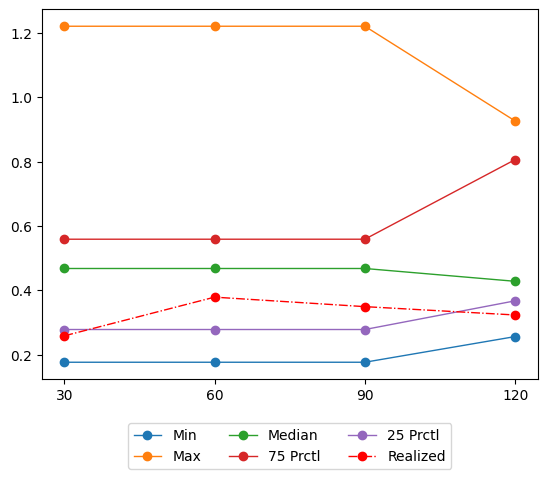

In [19]:
# Assuming min_, max_, etc. are numpy arrays or lists
plt.plot(windows, min_[:4], "-o", linewidth=1, label="Min")
plt.plot(windows, max_[:4], "-o", linewidth=1, label="Max")
plt.plot(windows, median[:4], "-o", linewidth=1, label="Median")
plt.plot(windows, top_q[:4], "-o", linewidth=1, label=f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows, bottom_q[:4], "-o", linewidth=1, label=f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows, realized[:4], "ro-.", linewidth=1, label="Realized")

plt.xticks(windows)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

The y-axis is the realized volatility over each time frame. The x-axis is time frame we use to compute the realized volatility.

There are three conclusions you can draw from this chart:

1. Over the 30-day window, there is a spike in realized volatility. Realized volatility spikes usually correspond to a drop in the stock price. This should tell us to explore the stock price to see what happened.
2. Realized volatility (the dashed line) is close to the lowest it’s been across all time frames. This is a data point to support a case to get long volatility (i.e. options are cheap).
3. Realized volatility is mean reverting. You can see this in the cone shape of the chart. This is a data point to support a case to get long volatility.